# Class 19: Decision Trees

1. log onto Prismia
1. say hello in the zoom chat

In [1]:
# %load http://drsmb.co/310
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

First we'll review the datasets from the assignment briefly.  More details on them will be on the solutions repo.

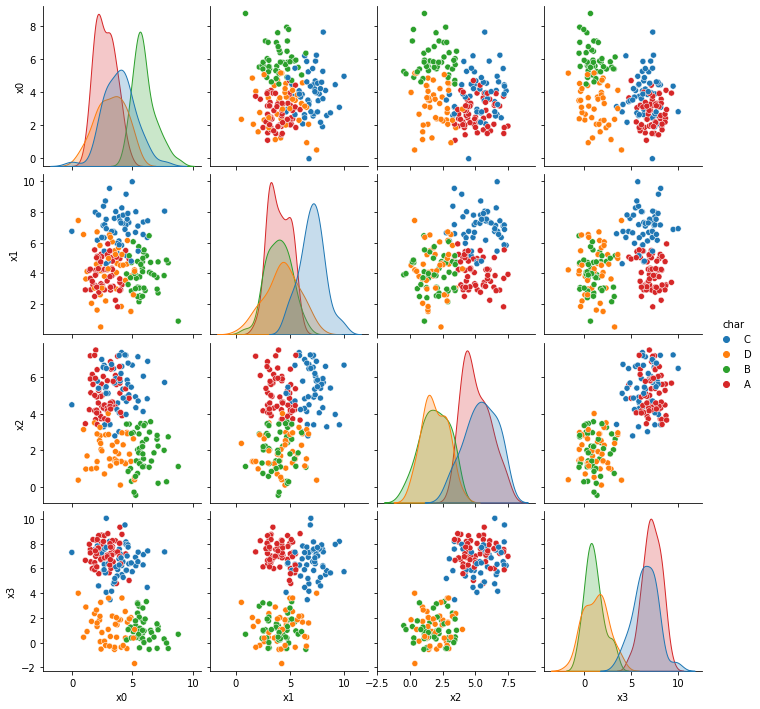

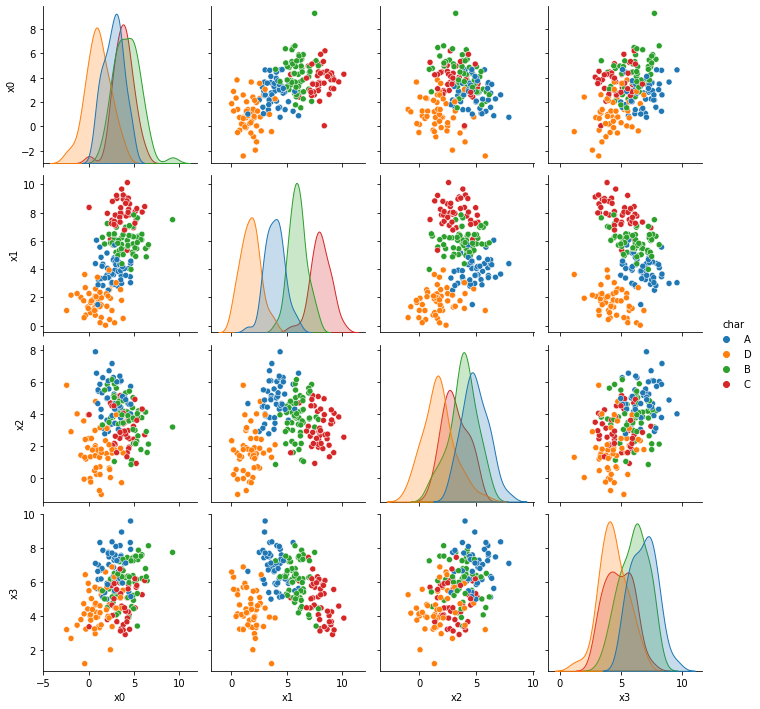

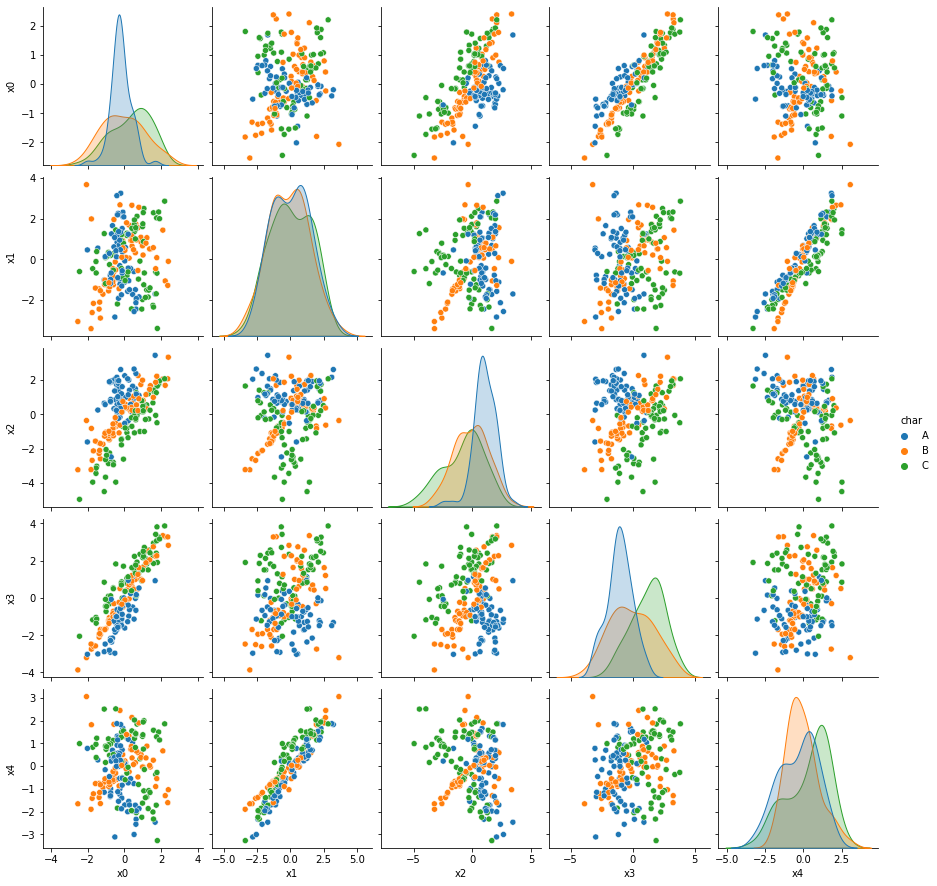

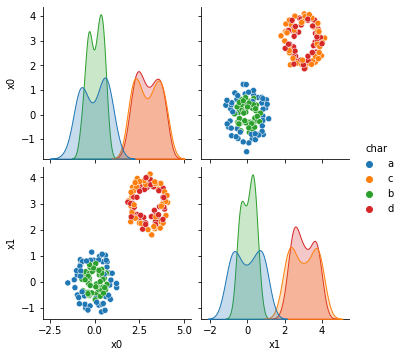

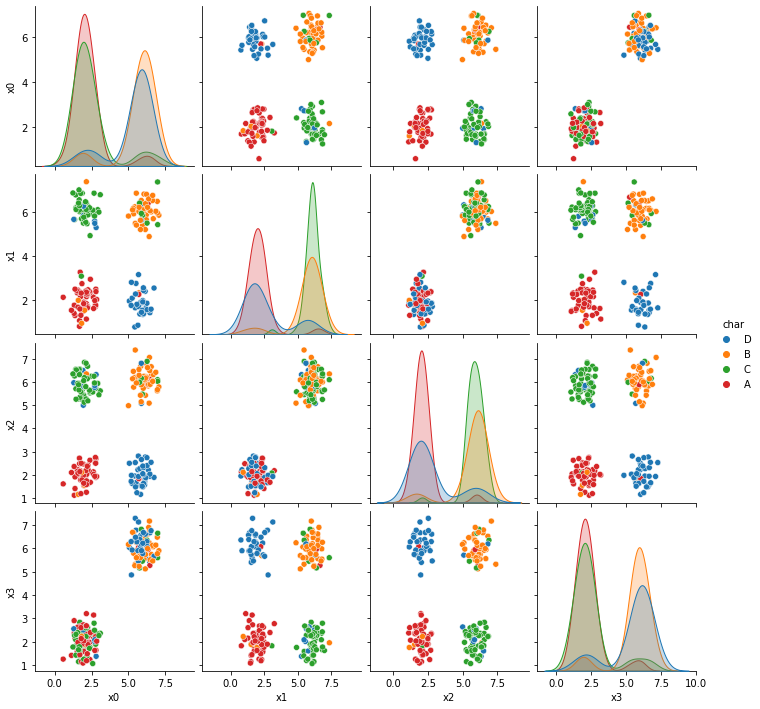

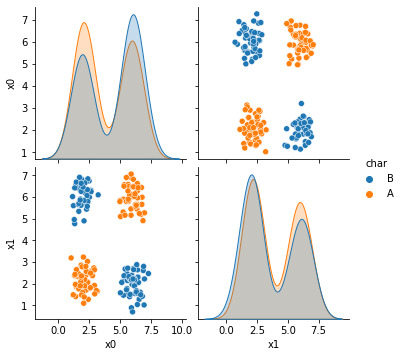

In [2]:
a6_data = 'https://raw.githubusercontent.com/rhodyprog4ds/06-naive-bayes/main/data/dataset'
data_urls = [a6_data + str(i) +'.csv' for i in range(1,7)]

# read in only the columns with actual data
[sns.pairplot(data =pd.read_csv(url,usecols=lambda c: not('Unnamed' in c)), hue='char') for url in data_urls]

Now we're looking at dataset 6 more deeply.

In [3]:
df6= pd.read_csv(data_urls[-1],usecols=[1,2,3])
df6.head()

x0    x1 char
0  6.14  2.10    B
1  2.22  2.39    A
2  2.27  5.44    B
3  1.03  3.19    A
4  2.25  1.71    A

This one Naive Bayes does poorly on, even though the classes are separable because each class is not defined by a single region.  Since each class has two noncontinuous resions.

In [4]:
dt = DecisionTreeClassifier()
X_train, X_test, y_train,  y_test = train_test_split(df6.values[:,:2],df6.values[:,2])

In [5]:
y_train

array(['B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'A',
       'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B',
       'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'A',
       'B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A',
       'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'B',
       'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B',
       'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A',
       'B', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B',
       'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'B', 'B', 'B', 'A', 'A', 'A'], dtype=object)

In [6]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(96.00882352941177, 201.90857142857143, 'X[1] <= 1.58\ngini = 0.5\nsamples = 150\nvalue = [73, 77]'),
 Text(39.38823529411765, 170.84571428571428, 'X[0] <= 3.83\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(19.694117647058825, 139.78285714285715, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(59.082352941176474, 139.78285714285715, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(152.62941176470588, 170.84571428571428, 'X[1] <= 1.94\ngini = 0.499\nsamples = 135\nvalue = [70, 65]'),
 Text(98.47058823529412, 139.78285714285715, 'X[0] <= 4.275\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(78.7764705882353, 108.72, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(118.16470588235295, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(206.78823529411767, 139.78285714285715, 'X[0] <= 1.86\ngini = 0.5\nsamples = 121\nvalue = [59, 62]'),
 Text(157.5529411764706, 108.72, 'X[1] <= 3.98\ngini = 0.417\nsamples = 27\nvalue = [8, 19]'),
 Text(137.85882352941178, 77

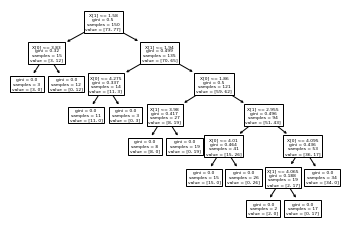

In [7]:
tree.plot_tree(dt)

In [8]:
print(tree.export_text(dt))

|--- feature_1 <= 1.58
|   |--- feature_0 <= 3.83
|   |   |--- class: A
|   |--- feature_0 >  3.83
|   |   |--- class: B
|--- feature_1 >  1.58
|   |--- feature_1 <= 1.94
|   |   |--- feature_0 <= 4.27
|   |   |   |--- class: A
|   |   |--- feature_0 >  4.27
|   |   |   |--- class: B
|   |--- feature_1 >  1.94
|   |   |--- feature_0 <= 1.86
|   |   |   |--- feature_1 <= 3.98
|   |   |   |   |--- class: A
|   |   |   |--- feature_1 >  3.98
|   |   |   |   |--- class: B
|   |   |--- feature_0 >  1.86
|   |   |   |--- feature_1 <= 2.96
|   |   |   |   |--- feature_0 <= 4.01
|   |   |   |   |   |--- class: A
|   |   |   |   |--- feature_0 >  4.01
|   |   |   |   |   |--- class: B
|   |   |   |--- feature_1 >  2.96
|   |   |   |   |--- feature_0 <= 4.10
|   |   |   |   |   |--- feature_1 <= 4.07
|   |   |   |   |   |   |--- class: A
|   |   |   |   |   |--- feature_1 >  4.07
|   |   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_0 >  4.10
|   |   |   |   |   |--- class: A



In [9]:
dt.score(X_test,y_test)

1.0

In [10]:
dt.get_depth()

6

In [11]:
dt2 = DecisionTreeClassifier(max_depth=2)

In [12]:
dt2.fit(X_train, y_train,)

DecisionTreeClassifier(max_depth=2)

In [13]:
dt2.score(X_test,y_test)

0.5

In [14]:
print(tree.export_text(dt2))

|--- feature_1 <= 1.58
|   |--- feature_0 <= 3.83
|   |   |--- class: A
|   |--- feature_0 >  3.83
|   |   |--- class: B
|--- feature_1 >  1.58
|   |--- feature_1 <= 1.94
|   |   |--- class: A
|   |--- feature_1 >  1.94
|   |   |--- class: B



In [15]:
dt2.score(X_train,y_train)

0.5866666666666667